In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import scipy.io
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier as SPE
from sklearn.metrics import balanced_accuracy_score

# %%
print(__doc__)

# Import imbalanced_ensemble
import imbalanced_ensemble as imbens

# Import utilities
from collections import Counter
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imbalanced_ensemble.ensemble.base import sort_dict_by_key

# Import plot utilities
import matplotlib.pyplot as plt
from imbalanced_ensemble.utils._plot import plot_2Dprojection_and_cardinality

Automatically created module for IPython interactive environment


In [2]:
data = scipy.io.loadmat('x.mat')
columns = np.asarray([['Electrode %d - %d/2 Hz'%(i+1, j+1)] for i in range(data['x'].shape[1]) for j in range(data['x'].shape[2])])
data['x'].shape
labels = pd.read_csv("table_withlabels.csv")
foof = pd.read_csv("foof2features.csv")
beh = pd.read_csv("behaviorals.csv")
df = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))
df.columns = columns
df['IDs'] = foof['C1']
df2 = pd.merge(df, labels[['label', 'IDs']], on='IDs', how='inner')
print(df2['label'].value_counts())

Other Neurodevelopmental Disorders    492
ADHD-Inattentive Type                 388
ADHD-Combined Type                    376
Anxiety Disorders                     241
No Diagnosis Given                    203
Depressive Disorders                   85
Name: label, dtype: int64


In [3]:
# traversing through disease
# column of dataFrame and 
# writing values where
# condition matches.
df2.label[df2.label == 'Other Neurodevelopmental Disorders'] = 1
df2.label[df2.label == 'ADHD-Inattentive Type'] = 2
df2.label[df2.label == 'ADHD-Combined Type'] = 3
df2.label[df2.label == 'Anxiety Disorders'] = 4
df2.label[df2.label == 'No Diagnosis Given'] = 5
df2.label[df2.label == 'Depressive Disorders'] = 6
print(df2['label'].unique())
print(df2['label'].value_counts())

df = df2
df.label = df['label'].astype(int)

[5 3 6 2 1 4]
1    492
2    388
3    376
4    241
5    203
6     85
Name: label, dtype: int64


/tmp/ipykernel_115908/3996038346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 'Other Neurodevelopmental Disorders'] = 1
/tmp/ipykernel_115908/3996038346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 'ADHD-Inattentive Type'] = 2
/tmp/ipykernel_115908/3996038346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 'ADHD-Combined Type'] = 3
/tmp/ipykernel_115

In [4]:
X = df[df.columns.difference(['IDs', 'label'])]
y = df['label']
print(X.shape)
y.shape

(1785, 8295)


(1785,)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
    test_size=0.5, stratify=y, random_state=42)


/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


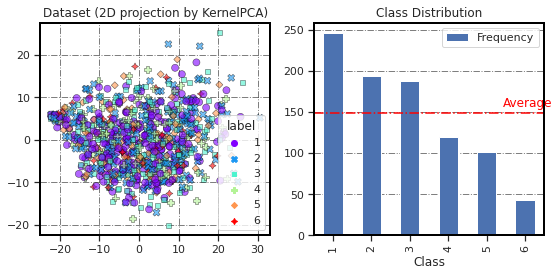

Training dataset distribution    {1: 246, 2: 194, 3: 188, 4: 120, 5: 101, 6: 43}
Validation dataset distribution  {1: 246, 2: 194, 3: 188, 4: 121, 5: 102, 6: 42}


In [13]:
# Visualize the training dataset
fig = plot_2Dprojection_and_cardinality(X_train, y_train, figsize=(8, 4))
plt.show()

# Print class distribution
print('Training dataset distribution    %s' % sort_dict_by_key(Counter(y_train)))
print('Validation dataset distribution  %s' % sort_dict_by_key(Counter(y_valid)))


In [14]:
# Use SVC as the base estimator

clf = SPE(
    n_estimators=5,
    base_estimator=SVC(probability=True), # Use SVM as the base estimator
    random_state=42,
).fit(X_train, y_train)

# Evaluate
balanced_acc_score = balanced_accuracy_score(y_valid, clf.predict(X_valid))
print (f'SPE: ensemble of {clf.n_estimators} {clf.base_estimator_}')
print ('Validation Balanced Accuracy: {:.3f}'.format(balanced_acc_score))



/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SPE: ensemble of 5 SVC(probability=True)
Validation Balanced Accuracy: 0.206


In [15]:

# %% [markdown]
# Enable training log
# -------------------
# (``fit()`` parameter ``train_verbose``: bool, int or dict)

clf = SPE(random_state=42).fit(
    X_train, y_train, 
    train_verbose=True, # Enable training log
)

/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             ┃                                                 ┃            Data: train             ┃
┃ #Estimators ┃               Class Distribution                ┃               Metric               ┃
┃             ┃                                                 ┃  acc    balanced_acc   weighted_f1 ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃      1      ┃   {1: 43, 2: 43, 3: 43, 4: 43, 5: 43, 6: 43}    ┃ 0.409      0.509          0.400    ┃
┃      5      ┃   {1: 43, 2: 43, 3: 43, 4: 43, 5: 43, 6: 43}    ┃ 0.524      0.602          0.519    ┃
┃     10      ┃   {1: 43, 2: 43, 3: 43, 4: 43, 5: 43, 6: 43}    ┃ 0.592      0.672          0.586    ┃
┃     15      ┃   {1: 43, 2: 43, 3: 43, 4: 43, 5: 43, 6: 43}    ┃ 0.601      0.687          0.595    ┃
┃     20      ┃   {1: 43, 2: 43, 3: 43, 4: 43, 5: 43, 6: 43}    ┃ 0.627  